In [26]:
from sklearn import datasets 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA

In [27]:
oliv = datasets.fetch_olivetti_faces()
# Olivetti data contains 400 images 10 imgaes each of 40 people !

In [28]:
oliv

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [29]:
oliv.keys() #keys to the dataset 

dict_keys(['data', 'images', 'target', 'DESCR'])

In [30]:
oliv['data'].shape #4096 features represents the 4096 pixels and we have 4096 columns and the number of images that we have is equal to 400

(400, 4096)

In [31]:
oliv['images'].shape  # so there are 400 imgaes of 64*64 each !

(400, 64, 64)

In [32]:
fig = plt.figure(figsize=(8,8)) #just drawing the 64 images and not all the 400 images 

<Figure size 576x576 with 0 Axes>

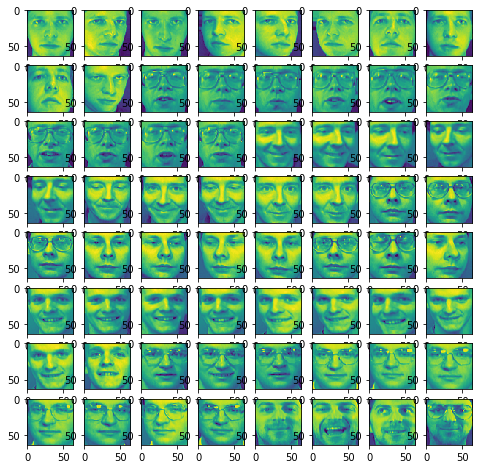

In [33]:
fig = plt.figure(figsize=(8,8))
for i in range(64) :
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(oliv.images[i]) 
plt.show()

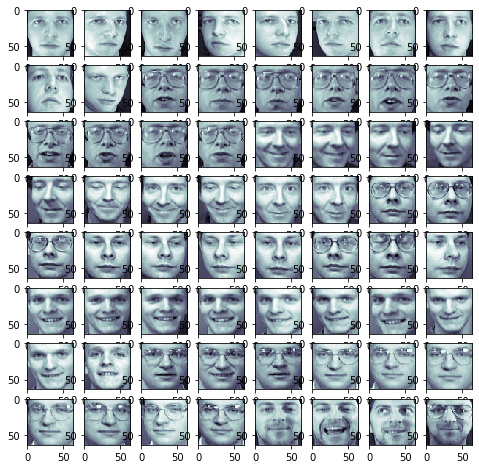

In [34]:
fig = plt.figure(figsize=(8,8))
for i in range(64) :
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(oliv.images[i] , cmap = plt.cm.bone) #cmap provides the colour mapping to the images commanding for the bone gives more clarity to the images 
plt.show()

In [35]:
x = oliv.data
y = oliv.target 

In [36]:
pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# number of components is the minimum of the two i.e if the size here is 400 * 4096.....then the number of components will be 400 and each component will be of 4096 length 

In [38]:
pca.components_.shape # this result satisfies the comment made above 

(400, 4096)

In [40]:
k = 0 
total = sum(pca.explained_variance_)
currentsum = 0
while currentsum/total < 0.99 :
    currentsum += pca.explained_variance_[k]
    k += 1
k

260

In [ ]:
# this result tells us that of the 4096 features we require only 260 features to retain the 99% of the data !
# here we have done the pca on the data as 4096 features are reduced to 260 features

In [41]:
k = 0 
total = sum(pca.explained_variance_)
currentsum = 0
while currentsum/total < 0.95 :
    currentsum += pca.explained_variance_[k]
    k += 1
k

# For the 95% of the accuracy ! We will want 123 features.

123

In [42]:
pca = PCA(n_components = k)
transformed_data = pca.fit_transform(x)
transformed_data.shape

# this is the result for the 95% of the data ! i.e to recieve the 95% of the data we want to have the 123 features for 400 images 

(400, 123)

In [ ]:
# This is the power of the pca i.e it has reduced the fetaures from 4096 to 123 while retaining 95% of the data ..
# This helped in memory optimization and also helped in achieving greater speed of processing !

In [ ]:
# now we will be reproducing the images ! from the pca applied data 

In [43]:
x_approx = pca.inverse_transform(transformed_data)

In [44]:
x_approx.shape # we got the original size back 

(400, 4096)

In [45]:
x_approx_images = x_approx.reshape((400, 64, 64))

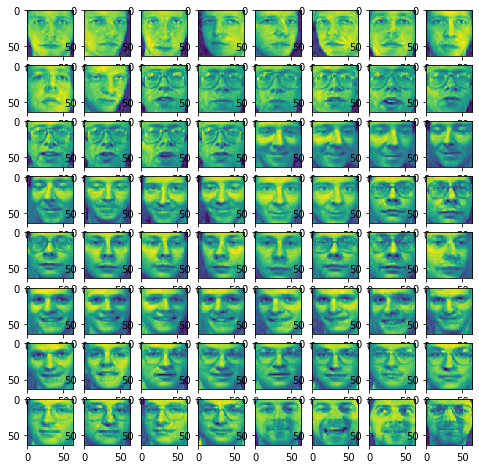

In [47]:
fig = plt.figure(figsize=(8,8))
for i in range(64) :
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(x_approx_images[i] ) 
plt.show()

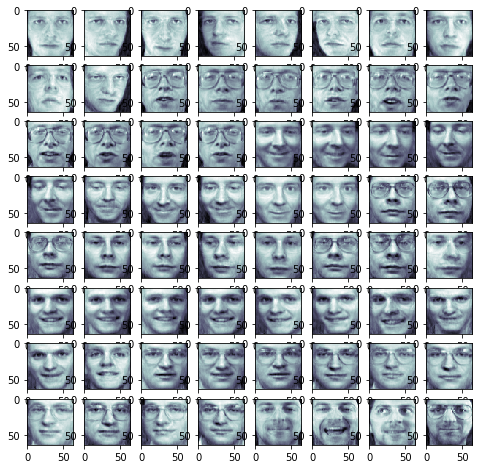

In [48]:
fig = plt.figure(figsize=(8,8))
for i in range(64) :
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(x_approx_images[i], cmap=plt.cm.bone ) 
plt.show()

In [ ]:
# eigen faces 

In [51]:
eigenv = pca.components_
eigenv

array([[-0.00419111, -0.00710952, -0.0093361 , ...,  0.00018516,
         0.00337966,  0.00318826],
       [-0.02859139, -0.03328835, -0.03784651, ...,  0.02962785,
         0.027213  ,  0.02488901],
       [ 0.00135689, -0.00032585, -0.00019811, ..., -0.01541364,
        -0.01370977, -0.01188341],
       ...,
       [-0.02535657, -0.01998486,  0.00347224, ..., -0.02678651,
        -0.0001575 , -0.00980855],
       [-0.01928678, -0.02218316, -0.00121984, ..., -0.01175348,
         0.00964224,  0.02941754],
       [ 0.01206818, -0.00774975,  0.00335225, ..., -0.00638333,
        -0.0063016 , -0.01979332]], dtype=float32)

In [52]:
eigenv.shape

(123, 4096)

In [53]:
eigenfaces = eigenv.reshape((123, 64, 64))

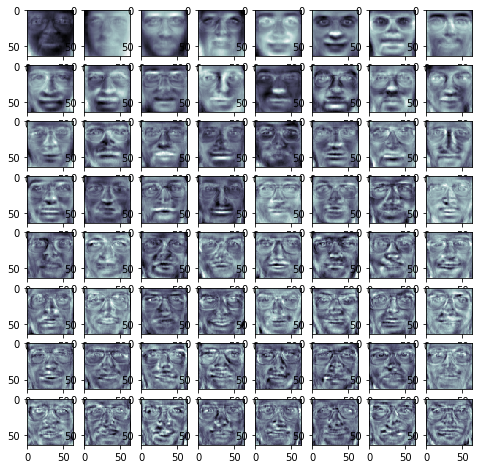

In [54]:
fig = plt.figure(figsize=(8,8))
for i in range(64) :
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(eigenfaces[i], cmap=plt.cm.bone ) 
plt.show()

In [55]:
#in case of images we call eigen vectors as eigen faces !
# the each new principal component represents some particular features of a image 
# each of the eigen faces are focusing the different aspects of the faces !
#similarly 50 features combined might tell about somebodies face 